### Things to be done:
- ***Clean up the data*** - Remove unnecessary, unwanted data; Remove Outliners (Absurd Data)
- ***Visualize***: x-y scatterPlot, bar chart, density plot
- ***Transform the data***: When no specific pattern is identifiable; 
- Determine ***distribution and varible*** type

In [1]:
# !pip install numpy pandas matplotlib seaborn scipy statsmodels gmaps

In [2]:
# !conda install -c conda-forge ipyleaflet
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings(action='once')

In [87]:
path = "datasets/mta_1706.csv"

In [88]:
df = pd.read_csv(path)

C:\Users\Anurag\AppData\Local\conda\conda\envs\apidb\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
df.drop(
    ['Unnamed: 17'],
    axis=1, 
    inplace=True
)

In [90]:
df.tail(5)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
1048570,05-06-2017 21:02,0,Bx36,W 179 ST/BROADWAY,40.849113,-73.937752,SOUNDVIEW PUGSLEY AV,40.820507,-73.851631,NYCT_7759,40.849260,-73.938736,W 178 ST/FT WASHINGTON AV,approaching,149,NaN,20:54:15
1048571,05-06-2017 21:02,1,B83,VAN SINDEREN AV/FULTON ST,40.678089,-73.903572,SPRING CREEK GATEWAY MALL,40.652821,-73.876755,NYCT_7139,40.664399,-73.893958,PENNSYLVANIA AV/LIVONIA AV,at stop,10,05-06-2017 21:02,20:59:00
1048572,05-06-2017 21:01,0,Q30,ARCHER AV /SUTPHIN BL,40.700489,-73.807884,LITTLE NECK L NECK PKY,40.764297,-73.725914,NYCT_8434,40.715850,-73.792586,HOMELAWN ST/ASPEN PL,at stop,14,NaN,21:02:49
1048573,05-06-2017 21:01,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,ROCK PKY STA,40.645775,-73.902069,NYCT_5002,40.624132,-73.970922,AV J/OCEAN PY,approaching,94,05-06-2017 21:03,21:02:16
1048574,05-06-2017 21:01,0,Q13,39 AV /138 ST,40.761009,-73.827042,FT TOTTEN,40.791351,-73.780952,NYCT_4171,40.757671,-73.779620,NORTHERN BL/204 ST,approaching,59,NaN,20:59:02


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
RecordedAtTime               1048575 non-null object
DirectionRef                 1048575 non-null int64
PublishedLineName            1048575 non-null object
OriginName                   1040112 non-null object
OriginLat                    1040112 non-null float64
OriginLong                   1040112 non-null float64
DestinationName              1048575 non-null object
DestinationLat               1047329 non-null float64
DestinationLong              1047329 non-null float64
VehicleRef                   1048575 non-null object
VehicleLocation.Latitude     1048575 non-null float64
VehicleLocation.Longitude    1048575 non-null float64
NextStopPointName            1047439 non-null object
ArrivalProximityText         1047439 non-null object
DistanceFromStop             1047439 non-null object
ExpectedArrivalTime          931342 non-null object
ScheduledArrivalTime         102290

### Categorical Datatype Example

In [92]:
df.DirectionRef.unique()

array([0, 1], dtype=int64)

## Using Mode

#### Common Initial and Final Stops for particular directions

In [93]:
origins = [
    df[df.DirectionRef==i]['OriginName'].value_counts().idxmax() 
    for i in df.DirectionRef.unique()
]
print(f"Common Origins:\n\tDir-0: {origins[0]}\n\tDir-1: {origins[1]}\n")

destinations = [
    df[df.DirectionRef==i]['DestinationName'].value_counts().idxmax() 
    for i in df.DirectionRef.unique()
]
print(f"Common Destinations:\n\tDir-0: {destinations[0]}\n\tDir-1: {destinations[1]}\n")

Common Origins:
	Dir-0: MERRICK BL/ARCHER AV
	Dir-1: E 126 ST/2 AV

Common Destinations:
	Dir-0: ST GEORGE FERRY
	Dir-1: WASHINGTON HTS GW BRIDGE



In [94]:
df[df.DirectionRef==0]['OriginName'].value_counts().idxmax()

'MERRICK BL/ARCHER AV'

#### Most frequent paths from those Initial Stops

In [95]:
paths_from_origins = list( map( lambda x : 
                               [ 
                                   x,
                                   df[ df.OriginName == x ][ "DestinationName" ].value_counts().idxmax(),
                                   df[ df.OriginName == x ][ "DestinationName" ].value_counts()[0]
                               ],
                               origins
                              )
                         )
print("Most Common Paths from Common Origins:\n")
k=0
for i in paths_from_origins:
    print("\tDirection Reference:", k)
    k+=1
    print("\tFrom:", i[0])
    print("\tTo:", i[1])
    print("\tNo of Trips:", i[2],"\n")

Most Common Paths from Common Origins:

	Direction Reference: 0
	From: MERRICK BL/ARCHER AV
	To: SELECT BUS BRONX ZOO via MAIN ST
	No of Trips: 6303 

	Direction Reference: 1
	From: E 126 ST/2 AV
	To: SELECT BUS SERVICE SOUTH FERRY via 2 AV
	No of Trips: 7646 



#### Most frequent paths to those Final Stops

In [96]:
paths_to_destinations = list( map( lambda x : 
                               [ 
                                   x,
                                   df[ df.DestinationName == x ][ "OriginName" ].value_counts().idxmax(),
                                   df[ df.DestinationName == x ][ "OriginName" ].value_counts()[0]
                               ],
                               destinations
                              )
                         )

print("\nMost Common Paths to Common Destination:\n")
k=0
for i in paths_to_destinations:
    print("\tDirection Reference:", k)
    k+=1
    print("\tFrom:", i[0])
    print("\tTo:", i[1])
    print("\tNo of Trips:", i[2],"\n")


Most Common Paths to Common Destination:

	Direction Reference: 0
	From: ST GEORGE FERRY
	To: YUKON AV/KMART DWY
	No of Trips: 3498 

	Direction Reference: 1
	From: WASHINGTON HTS GW BRIDGE
	To: RANDALL AV/OLMSTEAD AV
	No of Trips: 5215 



##### However there are no buses directly from those initial to final stops

In [97]:
ini_stop_0 = df[df["DirectionRef"]==0]['OriginName'].mode().get(0)
ini_stop_1 = df[df["DirectionRef"]==1]['OriginName'].mode().get(0)
fin_stop_1 = df[df["DirectionRef"]==1]['DestinationName'].mode().get(0)
fin_stop_0 = df[df["DirectionRef"]==0]['DestinationName'].mode().get(0)

In [98]:
(df[df["DirectionRef"]==0][df['OriginName']==ini_stop_0].mode())[["OriginName", "DestinationName"]]

C:\Users\Anurag\AppData\Local\conda\conda\envs\apidb\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,OriginName,DestinationName
0,MERRICK BL/ARCHER AV,SELECT BUS BRONX ZOO via MAIN ST


In [99]:
(df[df["DirectionRef"]==1][df['OriginName']==ini_stop_1].mode())[["OriginName", "DestinationName"]]

C:\Users\Anurag\AppData\Local\conda\conda\envs\apidb\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,OriginName,DestinationName
0,E 126 ST/2 AV,SELECT BUS SERVICE SOUTH FERRY via 2 AV


In [100]:
print(df[df["DirectionRef"]==0][df['OriginName']==ini_stop_0][["OriginName", "DestinationName"]][df.DestinationName==fin_stop_0].count(),"\n")
print(df[df["DirectionRef"]==0][df['OriginName']==ini_stop_0][["OriginName", "DestinationName"]][df.DestinationName==fin_stop_1].count())

C:\Users\Anurag\AppData\Local\conda\conda\envs\apidb\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


OriginName         0
DestinationName    0
dtype: int64 

OriginName         0
DestinationName    0
dtype: int64


### Using Mean

In [101]:
from math import cos, sin, radians, atan2, sqrt, degrees, pi

pos = pd.DataFrame()

pos["Lat"] = np.hstack((df.OriginLat.dropna(), df.DestinationLat.dropna()))
pos["Lat"] = pos.Lat.apply(radians)

pos["Lon"] = np.hstack((df.OriginLong.dropna(), df.DestinationLong.dropna()))
pos["Lon"] = pos.Lon.apply(radians)

pos = pos.drop_duplicates()

pos["X"] = np.vectorize(lambda lat, lon: cos(lat)*cos(lon))(pos["Lat"], pos["Lon"])
pos["Y"] = np.vectorize(lambda lat, lon: cos(lat)*sin(lon))(pos["Lat"], pos["Lon"])
pos["Z"] = np.vectorize(sin)(pos["Lat"])

x = pos.X.mean()
y = pos.Y.mean()
z = pos.Z.mean()

Center_Lon = atan2(y, x)
Hyp = sqrt(x*x + y*y)
Center_Lat = atan2(z, Hyp)

print(f"Location Equidistant from all bus stops: {degrees(Center_Lat)} N, {-1*degrees(Center_Lon)} W")

Location Equidistant from all bus stops: 40.7178038962956 N, 73.9382220213454 W


In [102]:
center = (degrees(Center_Lat),degrees(Center_Lon))

from ipyleaflet import Map, Marker, MarkerCluster
m = Map(center=center, zoom=10)

markers=list()
markers = ( Marker(location=(degrees(i[0]), degrees(i[1]))) for i in np.array(pos) )

marker = Marker(location=center, draggable=False)
marker_cluster = MarkerCluster( markers=tuple(markers) )

m.add_layer(marker)
m.add_layer(marker_cluster)
display(m)

Map(center=[40.7178038962956, -73.9382220213454], controls=(ZoomControl(options=['position', 'zoom_in_text', '…

### Hist Plots

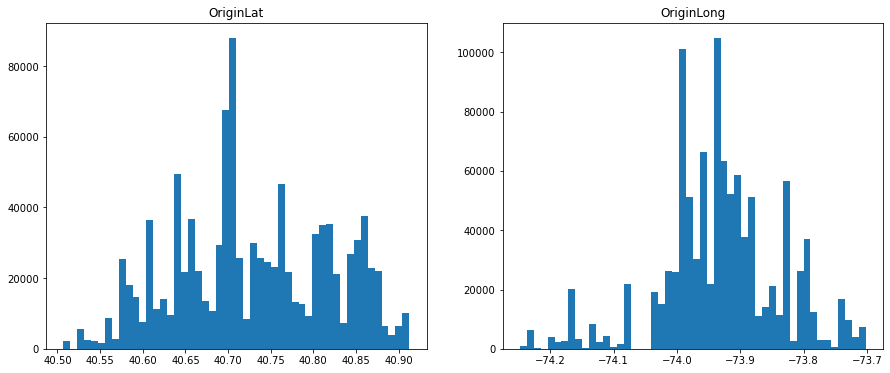

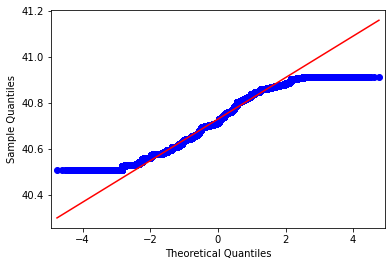

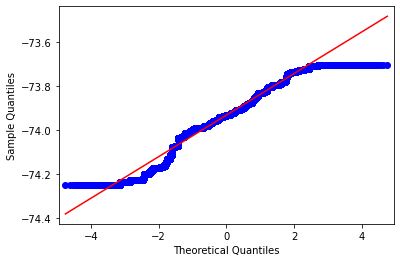

In [103]:
fig,a =  plt.subplots(1,2, figsize=(15,6))

a[0].set_title("OriginLat")
a[0].hist(df.OriginLat.dropna(), bins=50)

a[1].set_title("OriginLong")
a[1].hist(df.OriginLong.dropna(), bins=50)
# stat, p = normaltest(df.OriginLat.dropna())
# print('Statistics=%.3f, p=%.3f' % (stat, p))
plt.show()

qqplot(df.OriginLat.dropna(), line='s')
plt.show()
qqplot(df.OriginLong.dropna(), line='s')
plt.show()


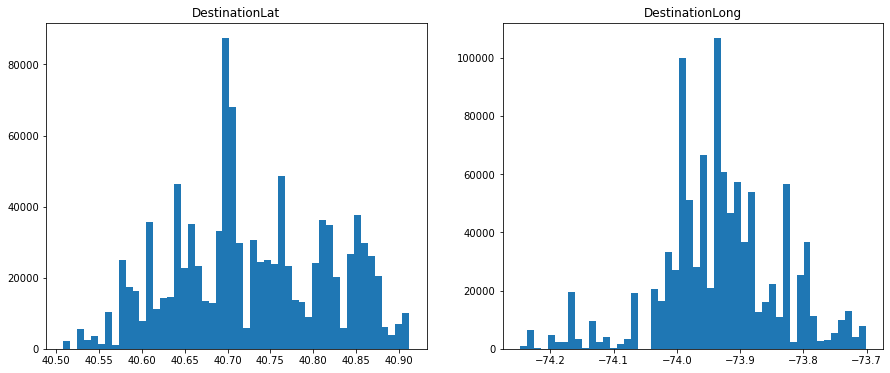

In [104]:
fig,a =  plt.subplots(1,2, figsize=(15,6))
a[0].set_title("DestinationLat")
a[0].hist(df.DestinationLat.dropna(), bins=50)

a[1].set_title("DestinationLong")
a[1].hist(df.DestinationLong.dropna(), bins=50)
plt.show()

In [105]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,01-06-2017 00:03,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76,01-06-2017 00:03,24:06:14
1,01-06-2017 00:03,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62,01-06-2017 00:03,23:58:02
2,01-06-2017 00:03,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5,01-06-2017 00:03,24:00:53
3,01-06-2017 00:03,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267,01-06-2017 00:04,24:03:00
4,01-06-2017 00:03,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11,01-06-2017 00:03,23:59:38


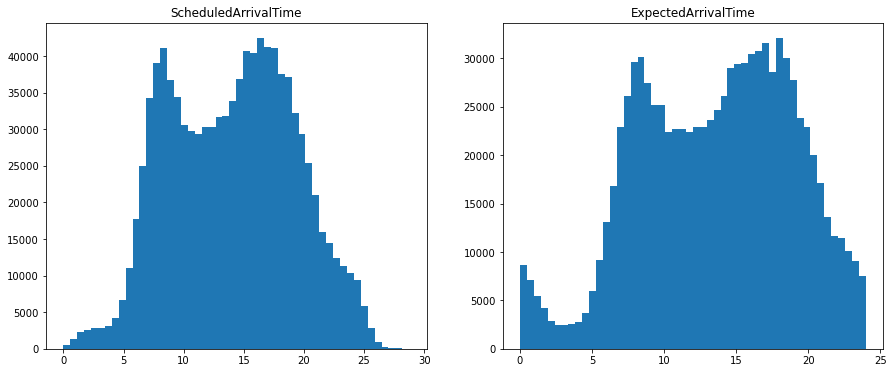

In [106]:
fig,a =  plt.subplots(1,2, figsize=(15,6))

dfTemp = df["ScheduledArrivalTime"].dropna()
dfTemp = np.array(dfTemp)
x = list(map(lambda x: int(x[:2])+int(x[3:5])/60, dfTemp))
a[0].hist(x, bins=50)
a[0].set_title("ScheduledArrivalTime")

dfTemp = df["ExpectedArrivalTime"].dropna()
dfTemp = np.array(dfTemp)

x = list(map(lambda x: x.split()[-1].strip().split(":"), dfTemp))
x = list(filter(lambda x: len(x)==2, x))
x = list(map(lambda x: (int(x[0])+int(x[1])/60), x))

a[1].hist(x, bins=50)
a[1].set_title("ExpectedArrivalTime")

plt.show()

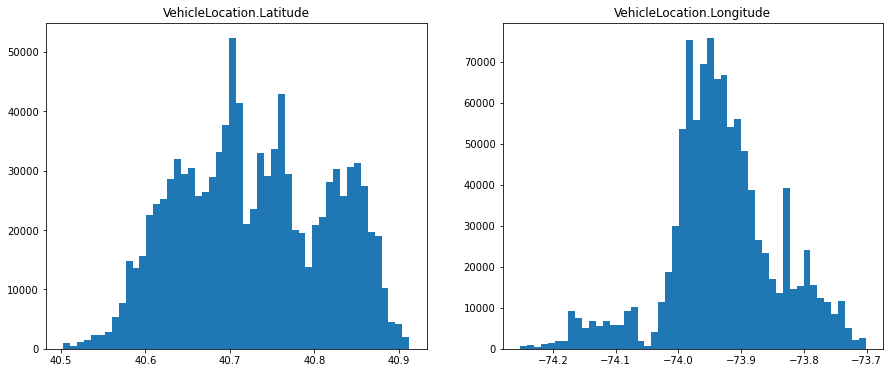

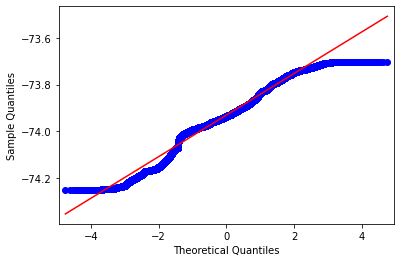

In [107]:
fig,a =  plt.subplots(1,2, figsize=(15,6))

dfTemp = df["VehicleLocation.Latitude"].dropna()
dfTemp = np.array(dfTemp)
a[0].set_title("VehicleLocation.Latitude")
a[0].hist(dfTemp, bins=50)
# stat, p = shapiro(dfTemp)
# print('Statistics=%.3f, p=%.3f' % (stat, p))

dfTemp = df["VehicleLocation.Longitude"].dropna()
dfTemp = np.array(dfTemp)
a[1].set_title("VehicleLocation.Longitude")
a[1].hist(dfTemp, bins=50)
plt.show()
# stat, p = shapiro(dfTemp[dfTemp.shape[0]//2:])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
qqplot(dfTemp, line='s')
plt.show()


In [108]:
def getplot(dfTemp):
    ax = sns.distplot(dfTemp,
                      bins=100,
                      kde=True,
                      color='skyblue',
                      hist_kws={"linewidth": 15,'alpha':1})
    ax.set(xlabel='Normal Distribution', ylabel='Frequency')
    plt.show()